In [1]:
import pandas as pd

boston = pd.read_csv("../../data/Boston.csv").rename({"Unnamed: 0": "ID"}, axis=1).set_index("ID")
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
ID,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9


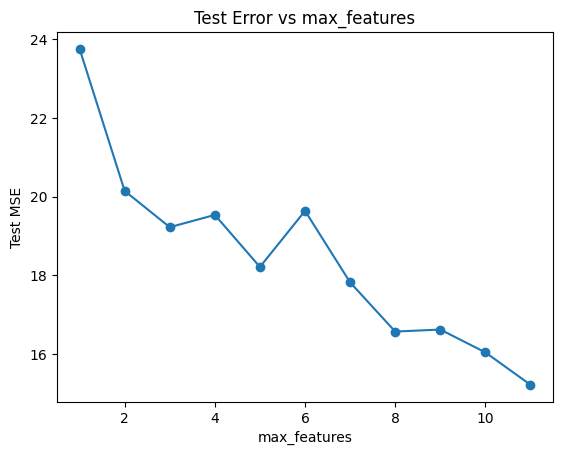

In [17]:
from sklearn.ensemble import RandomForestRegressor as RF
import sklearn.model_selection as skm
import numpy as np
import matplotlib.pyplot as plt

X = boston[boston.columns.drop('medv')]
Y = boston["medv"]

(X_train,
 X_test,
 y_train,
 y_test) = skm.train_test_split(X,
                                Y,
                                test_size=0.3,
                                random_state=0)

test_err_pred = []

for i in range(1, X_train.shape[1]):
    bag_boston = RF(max_features=i,
                    n_estimators=200,
                    random_state=0).fit(X_train, y_train)
    y_hat_bag = bag_boston.predict(X_test)
    test_err_pred.append(np.mean((y_test - y_hat_bag)**2))

plt.plot(range(1, X_train.shape[1]), test_err_pred, marker='o')
plt.xlabel('max_features')
plt.ylabel('Test MSE')
plt.title('Test Error vs max_features')

plt.show()

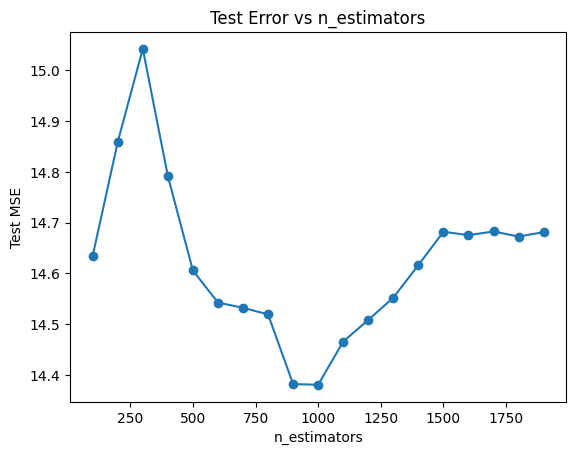

In [18]:
test_err_est = []

for i in range(100, 2000, 100):
    bag_boston = RF(max_features=X_train.shape[1],
                    n_estimators=i,
                    random_state=0).fit(X_train, y_train)
    y_hat_bag = bag_boston.predict(X_test)
    test_err_est.append(np.mean((y_test - y_hat_bag)**2))

plt.plot(range(100, 2000, 100), test_err_est, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('Test MSE')
plt.title('Test Error vs n_estimators')

plt.show()

For this dataset, the test error initially decreased as the number of features considered at each split increased, reaching a low point around five features. Interestingly, there was a spike in test error when six features were used, after which the error gradually declined as more features were included, ultimately stabilizing when all eleven predictors were used. Regarding the number of trees, the test error steadily decreased as the number of estimators increased, reaching a minimum at approximately 900 trees. Beyond 1000 estimators, the error began to rise, suggesting that adding more trees beyond this point offered little benefit and may have introduced minor overfitting or numerical instability.